<a href="https://colab.research.google.com/github/Alexandre77777/neural_networks/blob/main/5.%20%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D1%8B%20%D0%A1%D0%9D%D0%A1%20%D0%B8%20Transfer%20Learning/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D1%8B_%D0%9D%D0%A1_%D0%B8_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

### 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
# Ваш код
from keras.applications import  ResNet50

model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
drive_path = 'drive/MyDrive/neural_networks/5lab/'

Mounted at /content/drive


In [ ]:
import cv2
image_paths = [f"{drive_path}test/{i+1}.jpg" for i in range(5)]
images = []

for img_path in image_paths:
        #Загрузка через OpenCV
        img = cv2.imread(img_path)

        # Конвертируем из BGR (OpenCV) в RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        print(f"Успешно загружено: {img_path}")

Успешно загружено: drive/MyDrive/neural_networks/5lab/test/1.jpg
Успешно загружено: drive/MyDrive/neural_networks/5lab/test/2.jpg
Успешно загружено: drive/MyDrive/neural_networks/5lab/test/3.jpg
Успешно загружено: drive/MyDrive/neural_networks/5lab/test/4.jpg
Успешно загружено: drive/MyDrive/neural_networks/5lab/test/5.jpg


### 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС (нормализация).

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [ ]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

def prepare_images(img_list, target_size=(224, 224)):
    processed_images = []
    for img in img_list:
            # Если изображение в формате numpy array (из OpenCV)
            if isinstance(img, np.ndarray):
                # Конвертируем numpy array в PIL Image
                img_pil = Image.fromarray(img)
            else:
                img_pil = img.copy()

            # Изменяем размер и преобразуем в массив
            img_resized = img_pil.resize(target_size)
            x = image.img_to_array(img_resized)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            processed_images.append(x)
    return processed_images

In [ ]:
processed_images = prepare_images(images)

### 1.5. Выведите изображения и соответствующие им классы (как в примере из теории)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


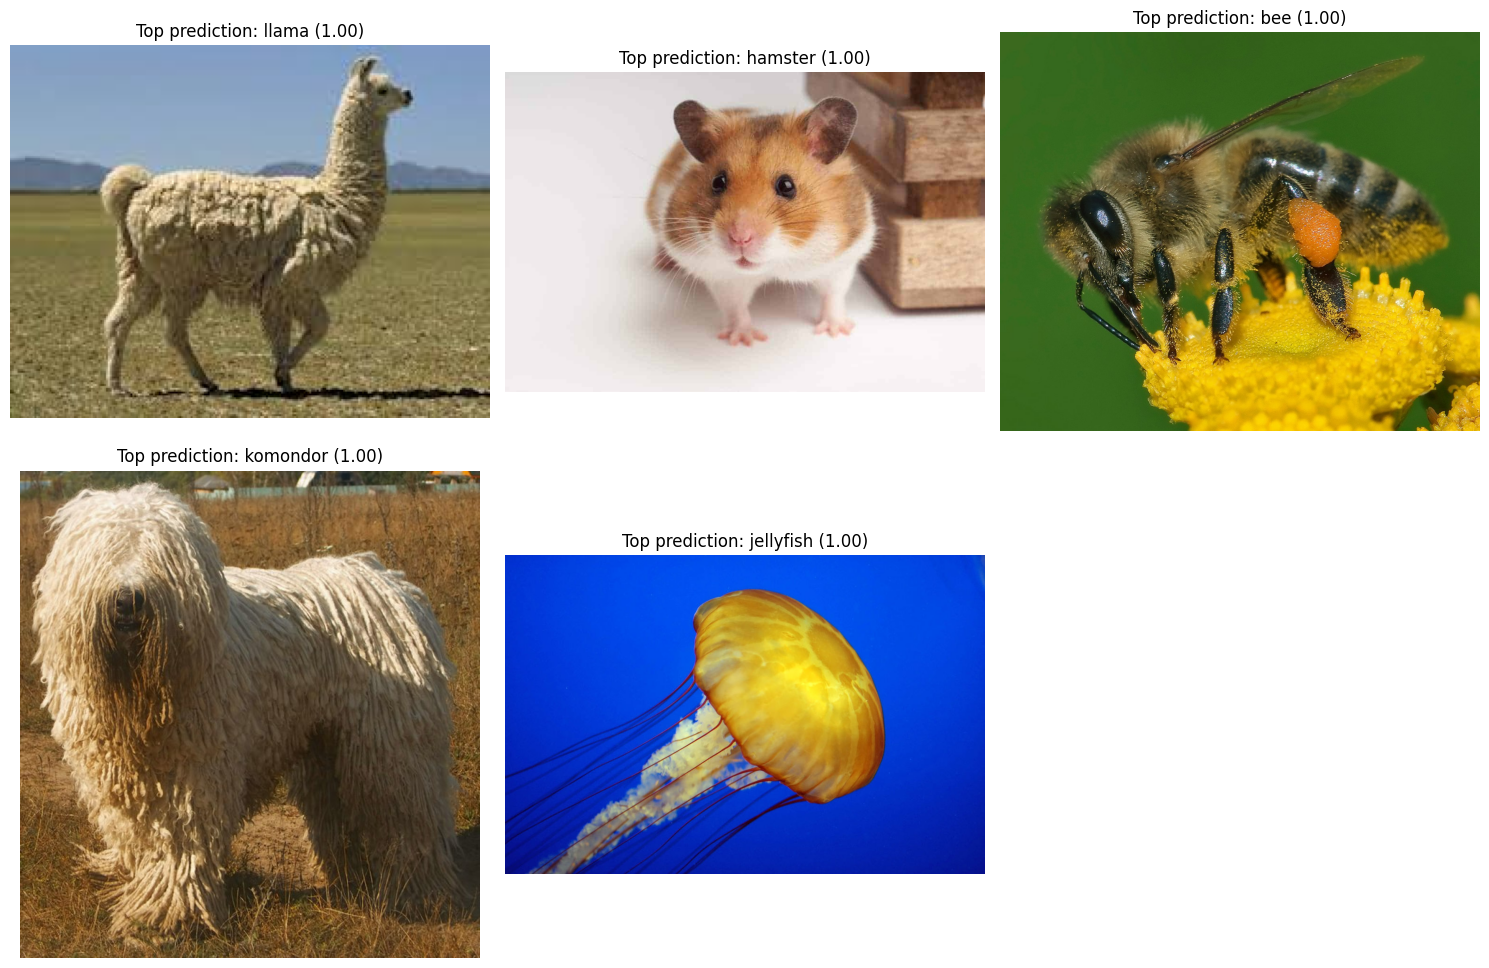

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import decode_predictions

plt.figure(figsize=(15, 10))
for i, (img, proc_img) in enumerate(zip(images, processed_images)):
    preds = model.predict(proc_img)
    decoded_preds = decode_predictions(preds, top=3)[0]

    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f'Top prediction: {decoded_preds[0][1]} ({decoded_preds[0][2]:.2f})')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Задание 2. Использование обученной модели для работы со своим датасетом

### 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
import tensorflow as tf

model = tf.keras.applications.ResNet50(include_top=False, # убираем полносвязные слои
                   input_shape=(64,64,3), # меняем параметры входных данных на свои
                   pooling='avg', # значение параметра означает, что после последнего сверточного слоя будет применена операция среднего пулинга
                   weights='imagenet') # указываем используемые веса (путь к файлу с предобученными весами)

model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 64, 64, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 70, 70, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 32, 32, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 32, 32, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 32, 32, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 34, 34, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 16, 16, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 16, 16, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 16, 16, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 16, 16, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 16, 16, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model.trainable = False

### 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [ ]:
import zipfile
import os

zip_path = 'drive/MyDrive/neural_networks/dataset.zip'
extract_dir = '.'

# Создаем папку для распаковки, если её нет
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Распаковка архива
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data_dir = 'dataset'
classes = ['cars', 'motorbike', 'bus']
img_size = (64, 64)

X = []
y = []

for class_idx, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        # Пропускаем скрытые файлы и не-JPG файлы
        if img_name.startswith('.') or not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(class_dir, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(img_size)
            X.append(np.array(img))
            y.append(class_idx)
        except Exception as e:
            print(f"Ошибка при обработке {img_path}: {e}")
            continue

X = np.array(X) / 255.0
y = to_categorical(np.array(y), num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.3. Обучение своей модели на основе предобученной модели "*название модели, выбранной в п.2.1.*"

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

my_model = Sequential()
my_model.add(model)
my_model.add(Flatten())
my_model.add(Dense(1024, activation='relu'))
my_model.add(Dropout(0.2))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(128, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Dense(3, activation='softmax'))

my_model.get_config()

{'name': 'sequential_2',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 64, 64, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_2'},
   'registered_name': None},
  {'module': 'keras.src.models.functional',
   'class_name': 'Functional',
   'config': {'name': 'resnet50',
    'trainable': False,
    'layers': [{'module': 'keras.layers',
      'class_name': 'InputLayer',
      'config': {'batch_shape': (None, 64, 64, 3),
       'dtype': 'float32',
       'sparse': False,
       'name': 'input_layer'},
      'registered_name': None,
      'name': 'input_layer',
      'inbound_nodes': []},
     {'module': 'keras.layers',
      'class_name': 'ZeroPadding2D',
      'config': {'name': 'conv1_pad',
       'trainable': False,
       'dtype': {'module': 'keras',
        'cl

In [ ]:
from tensorflow.keras.optimizers import Adam

my_model.compile(optimizer=Adam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = my_model.fit(X_train, y_train,
                      batch_size=64,
                      epochs=15,
                      validation_data=(X_test, y_test))

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.3629 - loss: 1.1358 - val_accuracy: 0.5383 - val_loss: 0.9565
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4711 - loss: 0.9865 - val_accuracy: 0.5400 - val_loss: 0.9003
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5751 - loss: 0.8755 - val_accuracy: 0.6233 - val_loss: 0.8267
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5946 - loss: 0.8259 - val_accuracy: 0.6433 - val_loss: 0.7815
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6234 - loss: 0.8001 - val_accuracy: 0.6417 - val_loss: 0.7490
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.6258 - loss: 0.7719 - val_accuracy: 0.5633 - val_loss: 0.7960
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6195 - loss: 0.7804 - val_accuracy: 0.6917 - val_loss: 0.7511
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.6658 - loss: 0.7294 - val_accuracy: 0.6367 - val_loss:

In [ ]:
my_model.save(drive_path + "tm_car_bus_mt.keras")

### 2.4. Визуализация процесса обучения модели

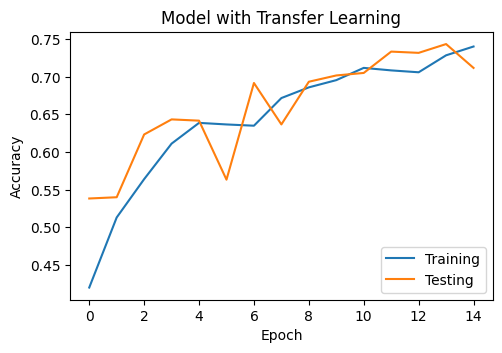

In [ ]:
# Ваш код
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Testing')
plt.title('Model with Transfer Learning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplots_adjust(hspace=0.3)

plt.show()

### 2.5. Реализуйте графический интерфейс для взаимодействия с обученной моделью, используя [Gradio](https://www.gradio.app/guides/image-classification-in-tensorflow). В качестве примеров (параметр examples в Gradio), используйте изображения из списка images (п.1.2.)

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.4 MB/s eta 0:00:00


In [ ]:
from keras.models import load_model
import gradio as gr
import pickle
import cv2

In [ ]:
# Ваш код
# Функция для предобработки изображения
def preprocess_image(img):

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (64, 64))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

In [ ]:
# Ваш код
def predict_image(img, preprocess_func = preprocess_image):
    # Загружаем модель и метки
    model = load_model(drive_path + "tm_car_bus_mt.keras")  # Загрузка модели Keras
    lb = pickle.loads(open("drive/MyDrive/neural_networks/2lab/labels", "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

In [ ]:
# Ваш код
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),
    outputs= gr.Label(num_top_classes=3),
    )

# Запускаем интерфейс
interface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://91c7163166a5c57b58.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://805eaa57a183c1fabd.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://91c7163166a5c57b58.gradio.live


# Задание 3. Классификация набора пространственных данных EuroSat (для магистров)

- Ссылка на датасет: https://github.com/phelber/eurosat

- Описание на kaggle: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

В этом задании Вам будет предоставлен набор данных EuroSat, который содержит снимки земной поверхности, снятые спутником Sentinel-2. Вам нужно будет обучить модель для классификации этих изображений на 10 классов, представляющих различные типы земного покрова.

### **3.1. Загрузка данных:**
  * [Скачайте](https://madm.dfki.de/files/sentinel/EuroSAT.zip) набор данных EuroSat
  * Разделите данные на обучающую, валидационную и тестовую выборки.



In [1]:
# Ваш код
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras
from google.colab import files
from io import BytesIO
from PIL import Image
from urllib.request import urlopen
import pickle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from imutils import paths
import os
import tensorflow as tf
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_path = 'drive/MyDrive/neural_networks/5lab/EuroSAT.zip'
extract_dir = '.'

# Создаем папку для распаковки, если её нет
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Распаковка архива
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [7]:
# # инициализируем данные и метки
data = []
labels = []

imagePaths = sorted(list(paths.list_images("2750")))
random.shuffle(imagePaths)

img_h = 96 # Высота изображения в пикселях
img_w = 96 # Ширина изображения в пикселях
img_ch = 3 #
def normalize(images, shape):
  images_new = images
  proc_images = []
  for image in images_new:
    proc_image = cv2.imread(image)
    proc_image = cv2.resize(proc_image, (shape[0], shape[1]))
    proc_image = keras.applications.mobilenet_v2.preprocess_input(proc_image)
    proc_images.append(proc_image)
  return (np.array(proc_images))

In [8]:

# # цикл по изображениям
data = normalize(imagePaths, (img_h,img_w,img_ch))
for imagePath in imagePaths:
 # меняем его разрешение на h*w пикселей (без учета соотношения сторон) а затем "выраниваем" его в вектор, состоящий из (32*32*3) 3072 пикселей
 # добавляем в список
	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток


In [9]:
# # масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
labels = np.array(labels)

In [10]:
(trainX, valX, trainY, valY) = train_test_split(data,
	labels, test_size=0.25, random_state=28)

In [11]:
# Преобразование буквенных меток в числовые значения
label_mapping = {label: i for i, label in enumerate(np.unique(labels))}

# Замена строковых меток числовыми значениями в обучающей и тестовой выборках
trainY = np.array([label_mapping[label] for label in trainY])
valY = np.array([label_mapping[label] for label in valY])

### **3.2. Выбор архитектуры нейронной сети:**
  * Выберите архитектуру нейронной сети, основанную на трансферном обучении, например, ResNet50, VGG16 или InceptionV3 ([полный список](https://keras.io/api/applications/)).
  * Загрузите предобученную модель выбранной архитектуры.


In [12]:
base_model = tf.keras.applications.MobileNetV2(include_top=False, # убираем полносвязные слои
                   input_shape=(img_h,img_w,img_ch), # меняем параметры входных данных на свои
                   pooling='avg', # значение параметра означает, что после последнего сверточного слоя будет применена операция среднего пулинга
                   weights='imagenet') #

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
base_model.trainable = False

In [14]:
my_model = Sequential()
my_model.add(base_model)
my_model.add(Flatten())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(len(label_mapping), activation='softmax'))

my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,918,986 (11.14 MB)

 Trainable params: 661,002 (2.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [15]:
my_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=2) # Остановка обучения, если валидационная точность не улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model_3.keras",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0)

### **3.3. Дообучение модели:**
  * Добавьте к предобученной модели несколько слоев для классификации изображений EuroSat.
  * Обучите модель на обучающей выборке.

In [17]:
history = my_model.fit(trainX, trainY, validation_data=(valX, valY),
	epochs=5, batch_size=64, callbacks=[early_stopping, checkpoint])

Epoch 1/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 243s 745ms/step - accuracy: 0.8355 - loss: 0.4875 - val_accuracy: 0.9182 - val_loss: 0.2335
Epoch 2/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 259s 735ms/step - accuracy: 0.9360 - loss: 0.1808 - val_accuracy: 0.9281 - val_loss: 0.2114
Epoch 3/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 255s 714ms/step - accuracy: 0.9530 - loss: 0.1317 - val_accuracy: 0.9313 - val_loss: 0.2172
Epoch 4/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 229s 723ms/step - accuracy: 0.9683 - loss: 0.0954 - val_accuracy: 0.9281 - val_loss: 0.2232




### **3.4. Оценка модели:**
  * Оцените производительность модели на валидационной и тестовой выборках.
  * Сравните результаты с другими архитектурами нейронных сетей.



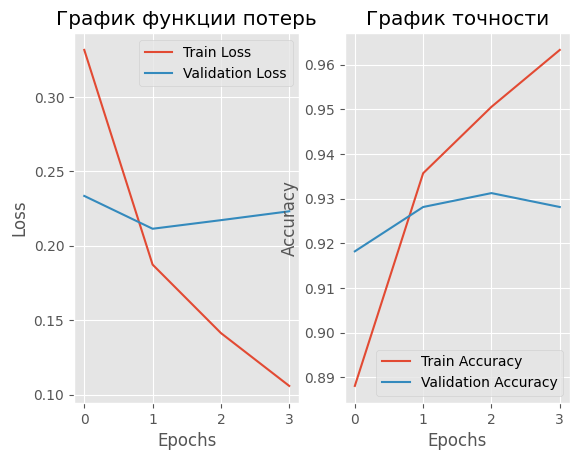

In [20]:
# График функции потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('График функции потерь')

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('График точности')

plt.show()

### **3.5. Анализ результатов:**
  * Проанализируйте влияние различных параметров на производительность модели, таких как:
      * Количество эпох обучения
      * Размер пакета
      * Функция активации
      * Оптимизатор
      * Регуляризация

-----------------------------------------
**Ваш вывод**
-----------------------------------------
